In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
import matplotlib.pyplot as plt

In [3]:
insu=pd.read_csv("D:\\LetsUpgrade\\Day 19\\auto_insurance_payment.csv")

In [4]:
insu.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [5]:
insu.tail()

,Number of claims,Total Payment
58,9,874
59,31,2098
60,14,955
61,53,2446
62,26,1875


In [6]:
insu.shape

(63, 2)

In [7]:
insu.size

126

In [8]:
insu.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


In [9]:
insu.dtypes

Number of claims    int64
 Total Payment      int64
dtype: object

In [10]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Number of claims  63 non-null     int64
 1    Total Payment    63 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [11]:
insu.isnull().sum()

Number of claims    0
 Total Payment      0
dtype: int64

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D6937A408>,
      dtype=object)

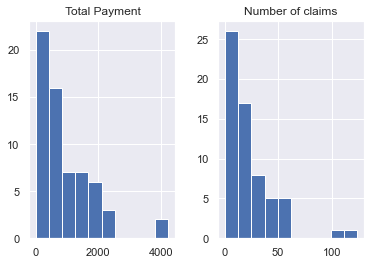

In [12]:
insu.hist()

In [13]:
insu.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


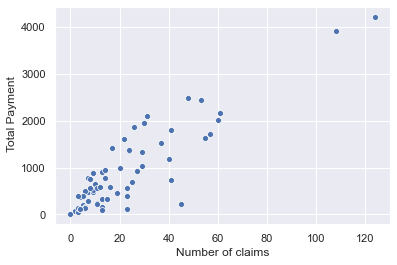

In [14]:
sns.scatterplot(insu["Number of claims"],insu[" Total Payment"])

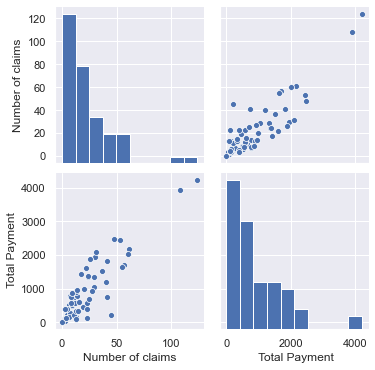

In [15]:
sns.pairplot(insu)

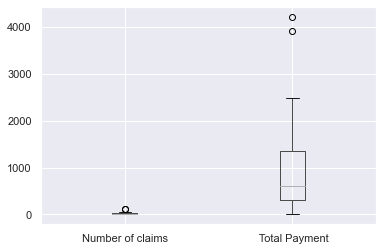

In [16]:
insu.boxplot()

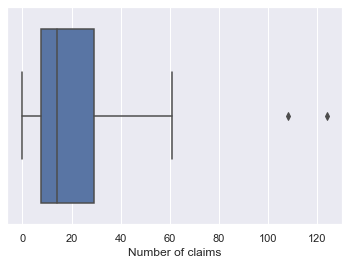

In [17]:
sns.boxplot(insu["Number of claims"])

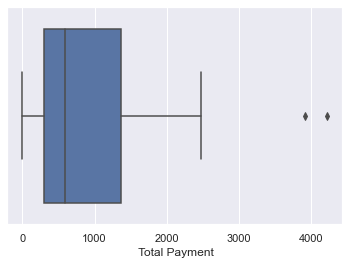

In [18]:
sns.boxplot(insu[" Total Payment"])

# Assign features to X and Y

In [19]:
insu.head(1)

,Number of claims,Total Payment
0,108,3925


In [20]:
X=insu.iloc[:,:1]

In [21]:
X.head()

,Number of claims
0,108
1,19
2,13
3,124
4,40


In [22]:
y=insu.iloc[:,1:]

In [23]:
y.head()

,Total Payment
0,3925
1,462
2,157
3,4222
4,1194


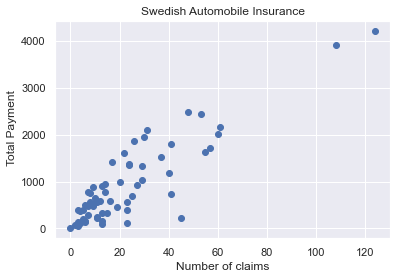

In [24]:
plt.scatter(X,y)
plt.title("Swedish Automobile Insurance")
plt.xlabel("Number of claims")
plt.ylabel(" Total Payment")
plt.show()

# Splits the records for training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
insu.shape

(63, 2)

In [28]:
X_train.shape,X_test.shape

((50, 1), (13, 1))

In [29]:
y_train.shape,y_test.shape

((50, 1), (13, 1))

# Model building from sk learn

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
len_reg=LinearRegression()

# Train the model

In [32]:
len_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
# coeff is nothing but slope
len_reg.coef_

array([[32.18742386]])

In [34]:
#intercept is nothing but constant
len_reg.intercept_

array([164.67433032])

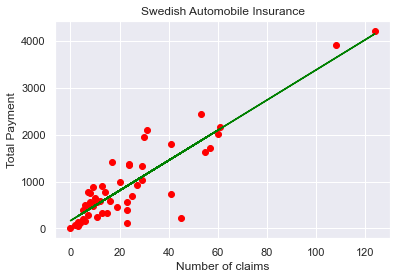

In [35]:
# Visualise training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,len_reg.predict(X_train),color='green')
plt.title("Swedish Automobile Insurance")
plt.xlabel("Number of claims")
plt.ylabel("Total Payment")
plt.show()

# Test the Model

In [36]:
ypred=len_reg.predict(X_test)

In [37]:
ypred

array([[1355.60901327],
       [ 261.23660191],
       [1001.54735077],
       [ 583.11084055],
       [ 357.7988735 ],
       [ 872.79765532],
       [ 293.42402578],
       [ 518.73599282],
       [1709.67067577],
       [ 583.11084055],
       [ 293.42402578],
       [ 615.29826441],
       [1452.17128486]])

In [38]:
X_test

,Number of claims
43,37
49,3
62,26
51,13
32,6
34,22
29,4
46,11
11,48
2,13


In [39]:
insu.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


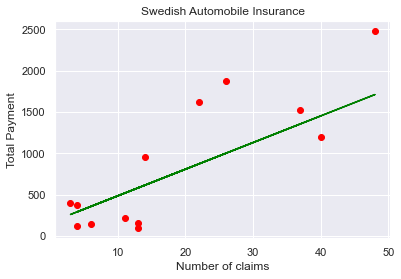

In [40]:
# Visualise testing set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,len_reg.predict(X_test),color='green')
plt.title("Swedish Automobile Insurance")
plt.xlabel("Number of claims")
plt.ylabel("Total Payment")
plt.show()

# Estimate the performance matrices or Cost

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R square Value is", r_square)
print("The RMSE Value is", RMSE)

The R square Value is 0.6488832597282386
The RMSE Value is 458.93148052499384


# How to Predict Forecast/ unseen Value

In [43]:
unseen_pred=len_reg.predict(np.array([[23]]))

print("The unseen value for given x is",unseen_pred)

The unseen value for given x is [[904.98507918]]
